:
# Mapping Barris Project Using Contextily
## Author: Olivia Rueschhoff
This project was originally developed in Google Colab and later exported for version control and portfolio presentation.



## Data Set Notice:

The datasets used in this project was provided as part of a university course.  
While the original public source was not specified, the data is believed to be derived from publicly available geographic and demographic datasets.

This repository includes only the data necessary to reproduce the analysis.

In [60]:
!pip3 install contextily

In [61]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

## File Import:

The data for this project uses GEOJSON files and Excel files to map a neighborhood in Barcelona, Spain and available places to rent within the area and each district of the area.

In [62]:
# load in all 6 of the files for this project in order of barris, districts, listings_24, listings_30, listings_33, and listings_45
from google.colab import files
uploaded = files.upload()

Saving barris.geojson to barris (2).geojson
Saving districts.geojson to districts (2).geojson
Saving listings_24.csv to listings_24 (2).csv
Saving listings_30.csv to listings_30 (2).csv
Saving listings_33.csv to listings_33 (2).csv
Saving listings_45.csv to listings_45 (2).csv


## Ploting Districts

This dataframe uses the GEOJSON files to plot the district boundaries over the city outline of Barcelona, Spain.

In [63]:
file_name = list(uploaded.keys())[0]
gdf = gpd.read_file(file_name)

In [64]:
gdf.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ..."
1,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.17701 41.38525, 2.17873 41.38396, ..."
2,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.19623 41.38745, 2.19631 41.38745, ..."
3,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
4,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,0,Sòlid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((2.18353 41.39227, 2.18238 41.39142, ..."


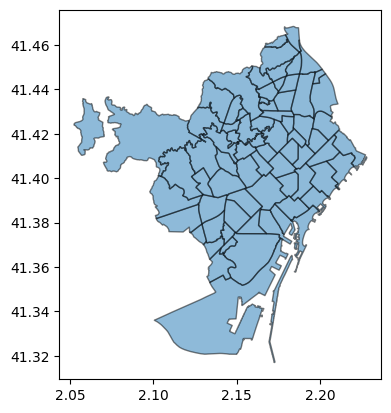

In [65]:
ax = gdf.plot(alpha=0.5, edgecolor='black')

## Plotting Listings
This dataframe places the listings of places to rent overtop the map with the district boundaries.

In [66]:
file_name = list(uploaded.keys())[2]
df = pd.read_csv(file_name)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.408886,2.185545,Entire home/apt,130,3,1,2015-10-10,0.03,29,61
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.404197,2.173058,Entire home/apt,110,1,4,2016-06-20,0.07,29,148
2,19157,"Great Place in Sagrada Familia, Bcn",73099,Urania,Eixample,la Sagrada Família,41.407929,2.174540,Private room,30,2,160,2018-05-18,1.68,2,69
3,20345,"2 Double rooms for 4 persons, WI-FI",76809,Mila,Nou Barris,Vilapicina i la Torre Llobeta,41.429497,2.181558,Private room,25,2,71,2018-05-03,0.73,1,335
4,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380768,2.175510,Private room,60,3,2,2017-11-06,0.15,2,0


In [67]:
lat_and_long = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["longitude"], df["latitude"], crs="EPSG:4326"))
lat_and_long

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.408886,2.185545,Entire home/apt,130,3,1,2015-10-10,0.03,29,61,POINT (2.18555 41.40889)
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.404197,2.173058,Entire home/apt,110,1,4,2016-06-20,0.07,29,148,POINT (2.17306 41.4042)
2,19157,"Great Place in Sagrada Familia, Bcn",73099,Urania,Eixample,la Sagrada Família,41.407929,2.174540,Private room,30,2,160,2018-05-18,1.68,2,69,POINT (2.17454 41.40793)
3,20345,"2 Double rooms for 4 persons, WI-FI",76809,Mila,Nou Barris,Vilapicina i la Torre Llobeta,41.429497,2.181558,Private room,25,2,71,2018-05-03,0.73,1,335,POINT (2.18156 41.4295)
4,21974,Comf. double room/private bathroom,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380768,2.175510,Private room,60,3,2,2017-11-06,0.15,2,0,POINT (2.17551 41.38077)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17216,25867202,Private luxury Suite and lounge with big terrace,193087775,Guillermo,Eixample,Sant Antoni,41.384010,2.162996,Private room,120,2,0,NaN,NaN,2,329,POINT (2.163 41.38401)
17217,25868244,Apartment close to the beach and shopping,29670225,Victoria,Sant Martí,el Besòs i el Maresme,41.413991,2.219469,Private room,100,2,0,NaN,NaN,1,352,POINT (2.21947 41.41399)
17218,25870653,DOUBLE COSY BEDROOM (Gothic - Pl. Catalunya),187449906,Andrea,Ciutat Vella,el Barri Gòtic,41.386462,2.173674,Private room,40,3,0,NaN,NaN,2,170,POINT (2.17367 41.38646)
17219,25871554,BIG COSY BEDROOM 3P - GOTHIC / PL CATALUNYA,187449906,Andrea,Ciutat Vella,el Barri Gòtic,41.386041,2.173715,Private room,70,3,0,NaN,NaN,2,170,POINT (2.17371 41.38604)


<Axes: >

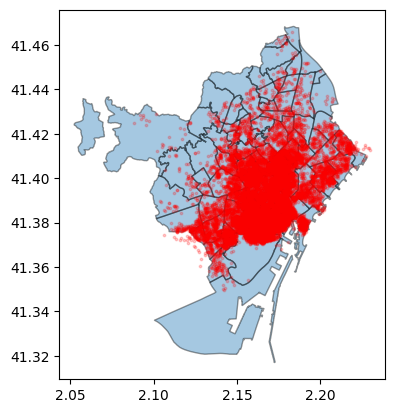

In [68]:
ax1 = gdf.plot(alpha=0.4, edgecolor='black')
lat_and_long.plot(ax=ax1, figsize=(10, 10), alpha=0.2, color="red", markersize=3)

## Using Contextily to Overlay Map
Using contextily we place the boundaries on top of a basemap of the neighborhoods to provide spatial context and reference.

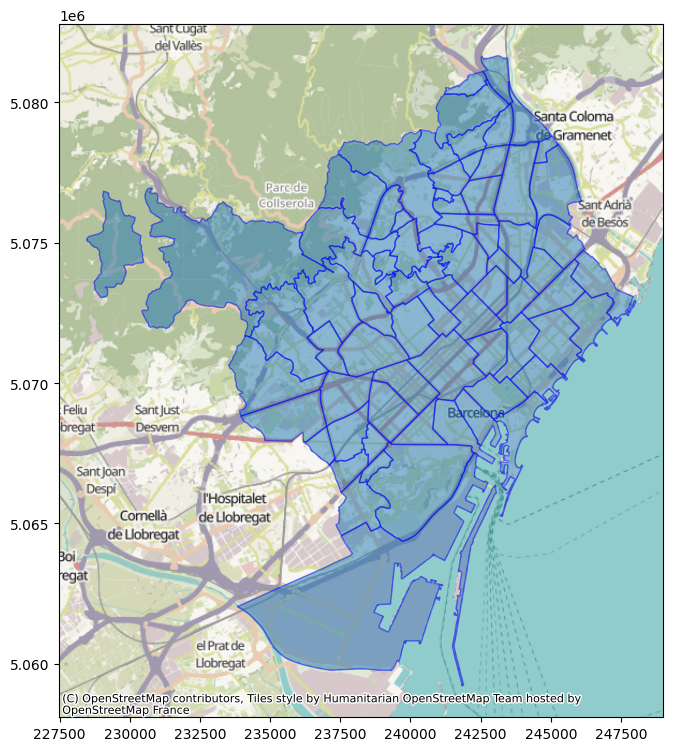

In [69]:
ax1 = gdf.to_crs('EPSG:3857').plot(figsize=(9, 9), alpha=0.5, edgecolor="blue")
ctx.add_basemap(ax1)

## Outlining Specific Areas
Here we outline the specific Eixample districts in the city.

In [70]:
file_name = list(uploaded.keys())[1]
district = gpd.read_file(file_name)
district.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."


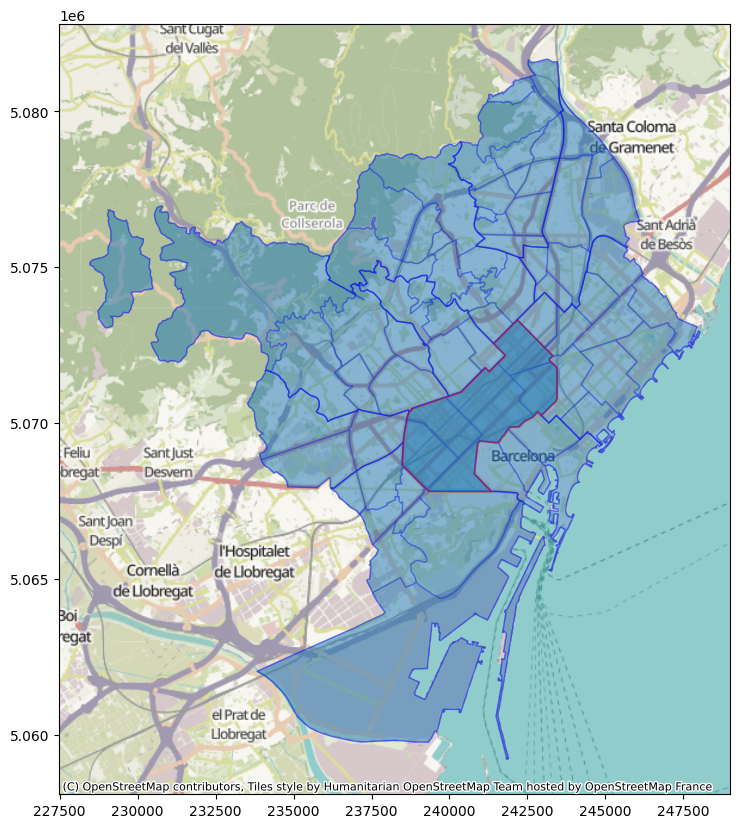

In [71]:
fig, ax2 = plt.subplots(figsize=(10, 10))

# Plot barris.geojson with blue outlies
gdf.to_crs('EPSG:3857').plot(ax=ax2, edgecolor='blue', alpha=0.3)

# Plot all districts with blue outline
district.to_crs('EPSG:3857').plot(ax=ax2, edgecolor='blue', alpha=0.3)

# Plot 'Eixample' district with red outline
eixample = district[district['NOM'] == 'Eixample']
eixample.to_crs('EPSG:3857').plot(ax=ax2, edgecolor='red', alpha=0.5)

# Add basemap from Contextily
ctx.add_basemap(ax=ax2)
plt.show()

## Rent Listings per Neighborhood
Count each amount from each Listing file per neighborhood so we can view things such as the density of each listing per neighborhood to view what each listing sets have a large amount of properties to rent for the area of the neighborhood.

In [72]:
file_name1 = list(uploaded.keys())[2]
list24 = pd.read_csv(file_name1)

file_name2 = list(uploaded.keys())[3]
list30 = pd.read_csv(file_name2)

file_name3 = list(uploaded.keys())[4]
list33 = pd.read_csv(file_name3)

file_name4 = list(uploaded.keys())[5]
list45 = pd.read_csv(file_name4)

In [73]:
# listing_24 count per neighborhood
by_neighborhood_24 = list24.groupby('neighbourhood').count()
neighborhood24_count = pd.DataFrame({ 'count24': by_neighborhood_24['id']}).reset_index()
neighborhood24_count.rename(columns={'neighbourhood': 'NOM'}, inplace=True)
neighborhood24_count

,NOM,count24
0,Baró de Viver,1
1,Can Baró,43
2,Can Peguera,2
3,Canyelles,6
4,Ciutat Meridiana,11
...,...,...
67,la Vila Olímpica del Poblenou,180
68,la Vila de Gràcia,979
69,les Corts,207
70,les Roquetes,13


In [74]:
# listing_30 count per neighborhood
by_neighborhood_30 = list30.groupby('neighbourhood').count()
neighborhood30_count = pd.DataFrame({ 'count30': by_neighborhood_30['id']}).reset_index()
neighborhood30_count.rename(columns={'neighbourhood': 'NOM'}, inplace=True)
neighborhood30_count

,NOM,count30
0,Baró de Viver,1
1,Can Baró,45
2,Can Peguera,1
3,Canyelles,7
4,Ciutat Meridiana,9
...,...,...
68,la Vila Olímpica del Poblenou,192
69,la Vila de Gràcia,1022
70,les Corts,223
71,les Roquetes,18


In [75]:
# listing_33 count per neighborhood
by_neighborhood_33 = list33.groupby('neighbourhood').count()
neighborhood33_count = pd.DataFrame({ 'count33': by_neighborhood_33['id']}).reset_index()
neighborhood33_count.rename(columns={'neighbourhood': 'NOM'}, inplace=True)
neighborhood33_count

,NOM,count33
0,Baró de Viver,2
1,Can Baró,44
2,Canyelles,5
3,Ciutat Meridiana,11
4,Diagonal Mar i el Front Marítim del Poblenou,177
...,...,...
65,la Vila Olímpica del Poblenou,178
66,la Vila de Gràcia,962
67,les Corts,223
68,les Roquetes,23


In [76]:
gdf_sorted = gdf[["AREA", "NOM"]].sort_values(by='NOM', ascending=True)

In [77]:
# listing_45 count per neighborhood
by_neighborhood_45 = list45.groupby('neighbourhood').count()
neighborhood45_count = pd.DataFrame({ 'count45': by_neighborhood_45['id']}).reset_index()
neighborhood45_count.rename(columns={'neighbourhood': 'NOM'}, inplace=True)
neighborhood45_count

,NOM,count45
0,Baró de Viver,1
1,Can Baró,39
2,Can Peguera,2
3,Canyelles,3
4,Ciutat Meridiana,7
...,...,...
66,la Vila Olímpica del Poblenou,197
67,la Vila de Gràcia,1125
68,les Corts,241
69,les Roquetes,35


In [78]:
gdf_sorted = pd.merge(gdf_sorted, neighborhood24_count, on='NOM', how='left')
gdf_sorted = pd.merge(gdf_sorted, neighborhood30_count, on='NOM', how='left')
gdf_sorted = pd.merge(gdf_sorted, neighborhood33_count, on='NOM', how='left')
gdf_sorted = pd.merge(gdf_sorted, neighborhood45_count, on='NOM', how='left')

In [79]:
# Density of Listings
gdf_sorted['Density24'] = gdf_sorted['count24']/gdf_sorted['AREA']
gdf_sorted['Density30'] = gdf_sorted['count30']/gdf_sorted['AREA']
gdf_sorted['Density33'] = gdf_sorted['count33']/gdf_sorted['AREA']
gdf_sorted['Density45'] = gdf_sorted['count45']/gdf_sorted['AREA']
gdf_sorted[['NOM','Density24', 'Density30', 'Density33', 'Density45']]

,NOM,Density24,Density30,Density33,Density45
0,Baró de Viver,0.000004,0.000004,0.000009,0.000004
1,Can Baró,0.000112,0.000117,0.000115,0.000102
2,Can Peguera,0.000017,0.000008,NaN,0.000017
3,Canyelles,0.000008,0.000009,0.000006,0.000004
4,Ciutat Meridiana,0.000029,0.000024,0.000029,0.000019
...,...,...,...,...,...
68,la Vila Olímpica del Poblenou,0.000195,0.000208,0.000192,0.000213
69,la Vila de Gràcia,0.000741,0.000774,0.000728,0.000852
70,les Corts,0.000147,0.000158,0.000158,0.000171
71,les Roquetes,0.000020,0.000028,0.000036,0.000054


The NaN values in this set means that there are no listings in the neighborhood for that listing set so therefore density doesn't exist either

In [80]:
# median price of 24
med_price_24 = list24.groupby('neighbourhood')['price'].median()
med_price_24

,price
neighbourhood,
Baró de Viver,25.0
Can Baró,39.0
Can Peguera,25.5
Canyelles,32.5
Ciutat Meridiana,19.0
...,...
la Vila Olímpica del Poblenou,118.5
la Vila de Gràcia,70.0
les Corts,58.0


In [81]:
# median price of 30
med_price_30 = list30.groupby('neighbourhood')['price'].median()
med_price_30

,price
neighbourhood,
Baró de Viver,25.0
Can Baró,35.0
Can Peguera,30.0
Canyelles,35.0
Ciutat Meridiana,20.0
...,...
la Vila Olímpica del Poblenou,95.0
la Vila de Gràcia,62.0
les Corts,60.0


In [82]:
# median price of 33
med_price_33 = list33.groupby('neighbourhood')['price'].median()
med_price_33

,price
neighbourhood,
Baró de Viver,27.5
Can Baró,47.5
Canyelles,35.0
Ciutat Meridiana,18.0
Diagonal Mar i el Front Marítim del Poblenou,105.0
...,...
la Vila Olímpica del Poblenou,100.0
la Vila de Gràcia,75.0
les Corts,68.0


In [83]:
# median price of 45
med_price_45 = list45.groupby('neighbourhood')['price'].median()
med_price_45

,price
neighbourhood,
Baró de Viver,25.0
Can Baró,45.0
Can Peguera,46.5
Canyelles,35.0
Ciutat Meridiana,25.0
...,...
la Vila Olímpica del Poblenou,100.0
la Vila de Gràcia,67.0
les Corts,75.0


No Error Encountered for NaNs in Price to get median. They are just disreguarded as median is just 50th percentile of the group.

## Room Type analysis
For each set of listings we can narrow down what the room type is to do a more in depth analysis. Entire home/apt room type was chosen as it's the most common/typical type.

In [84]:
room_type24 = list24[list24['room_type'] == 'Entire home/apt']
room_type30 = list30[list30['room_type'] == 'Entire home/apt']
room_type33 = list33[list33['room_type'] == 'Entire home/apt']
room_type45 = list45[list45['room_type'] == 'Entire home/apt']

In [85]:
# listing_24 count per neighborhood, only Entire home/apt
by_room_24 = room_type24.groupby('neighbourhood').count()
room24_count = pd.DataFrame({ 'count24': by_room_24['id']}).reset_index()
room24_count.rename(columns={'neighbourhood': 'NOM'}, inplace=True)
room24_count

,NOM,count24
0,Baró de Viver,1
1,Can Baró,15
2,Canyelles,2
3,Diagonal Mar i el Front Marítim del Poblenou,121
4,Horta,8
...,...,...
63,la Vila Olímpica del Poblenou,112
64,la Vila de Gràcia,497
65,les Corts,84
66,les Roquetes,2


In [86]:
# listing_30 count per neighborhood, only Entire home/apt
by_room_30 = room_type30.groupby('neighbourhood').count()
room30_count = pd.DataFrame({ 'count30': by_room_30['id']}).reset_index()
room30_count.rename(columns={'neighbourhood': 'NOM'}, inplace=True)
room30_count

,NOM,count30
0,Baró de Viver,1
1,Can Baró,21
2,Canyelles,1
3,Diagonal Mar i el Front Marítim del Poblenou,123
4,Horta,4
...,...,...
64,la Vila Olímpica del Poblenou,118
65,la Vila de Gràcia,543
66,les Corts,99
67,les Roquetes,7


In [87]:
# listing_33 count per neighborhood, only Entire home/apt
by_room_33 = room_type33.groupby('neighbourhood').count()
room33_count = pd.DataFrame({ 'count33': by_room_33['id']}).reset_index()
room33_count.rename(columns={'neighbourhood': 'NOM'}, inplace=True)
room33_count

,NOM,count33
0,Baró de Viver,1
1,Can Baró,19
2,Canyelles,2
3,Diagonal Mar i el Front Marítim del Poblenou,109
4,Horta,6
...,...,...
62,la Vila Olímpica del Poblenou,114
63,la Vila de Gràcia,543
64,les Corts,113
65,les Roquetes,8


In [88]:
# listing_45 count per neighborhood, only Entire home/apt
by_room_45 = room_type45.groupby('neighbourhood').count()
room45_count = pd.DataFrame({ 'count45': by_room_45['id']}).reset_index()
room45_count.rename(columns={'neighbourhood': 'NOM'}, inplace=True)
room45_count

,NOM,count45
0,Baró de Viver,1
1,Can Baró,19
2,Canyelles,1
3,Diagonal Mar i el Front Marítim del Poblenou,129
4,Horta,6
...,...,...
63,la Vila Olímpica del Poblenou,115
64,la Vila de Gràcia,606
65,les Corts,106
66,les Roquetes,10


In [89]:
gdf_sorted2 = pd.DataFrame(gdf[["AREA", "NOM"]].sort_values(by='NOM', ascending=True))

In [90]:
gdf_sorted2 = pd.merge(gdf_sorted2, room24_count, on='NOM', how='left')
gdf_sorted2 = pd.merge(gdf_sorted2, room30_count, on='NOM', how='left')
gdf_sorted2 = pd.merge(gdf_sorted2, room33_count, on='NOM', how='left')
gdf_sorted2 = pd.merge(gdf_sorted2, room45_count, on='NOM', how='left')

In [91]:
# Density of Listings, only Entire home/apt
gdf_sorted2['density_24'] = gdf_sorted2['count24']/gdf_sorted2['AREA']
gdf_sorted2['density_30'] = gdf_sorted2['count30']/gdf_sorted2['AREA']
gdf_sorted2['density_33'] = gdf_sorted2['count33']/gdf_sorted2['AREA']
gdf_sorted2['density_45'] = gdf_sorted2['count45']/gdf_sorted2['AREA']
gdf_sorted2[['NOM','density_24', 'density_30', 'density_33', 'density_45']]

,NOM,density_24,density_30,density_33,density_45
0,Baró de Viver,0.000004,0.000004,0.000004,0.000004
1,Can Baró,0.000039,0.000055,0.000049,0.000049
2,Can Peguera,NaN,NaN,NaN,NaN
3,Canyelles,0.000003,0.000001,0.000003,0.000001
4,Ciutat Meridiana,NaN,NaN,NaN,NaN
...,...,...,...,...,...
68,la Vila Olímpica del Poblenou,0.000121,0.000128,0.000123,0.000124
69,la Vila de Gràcia,0.000376,0.000411,0.000411,0.000459
70,les Corts,0.000060,0.000070,0.000080,0.000075
71,les Roquetes,0.000003,0.000011,0.000012,0.000016


The NaN values indicate that there are no Entire homes/apt in the specific neighborhood, making the density NaN as well.

In [92]:
# median price of 24, only Entire home/apt
med_price_24 = room_type24.groupby('neighbourhood')['price'].median()
med_price_24

,price
neighbourhood,
Baró de Viver,25.0
Can Baró,80.0
Canyelles,89.0
Diagonal Mar i el Front Marítim del Poblenou,229.0
Horta,100.0
...,...
la Vila Olímpica del Poblenou,180.0
la Vila de Gràcia,100.0
les Corts,100.0


In [93]:
# median price of 30, only Entire home/apt
med_price_30 = room_type30.groupby('neighbourhood')['price'].median()
med_price_30

,price
neighbourhood,
Baró de Viver,25.0
Can Baró,75.0
Canyelles,80.0
Diagonal Mar i el Front Marítim del Poblenou,150.0
Horta,75.0
...,...
la Vila Olímpica del Poblenou,150.0
la Vila de Gràcia,90.0
les Corts,75.0


In [94]:
# median price of 33, only Entire home/apt
med_price_33 = room_type33.groupby('neighbourhood')['price'].median()
med_price_33

,price
neighbourhood,
Baró de Viver,25.0
Can Baró,85.0
Canyelles,74.5
Diagonal Mar i el Front Marítim del Poblenou,217.0
Horta,54.0
...,...
la Vila Olímpica del Poblenou,180.0
la Vila de Gràcia,99.0
les Corts,85.0


In [95]:
# median price of 45, only Entire home/apt
med_price_45 = room_type45.groupby('neighbourhood')['price'].median()
med_price_45

,price
neighbourhood,
Baró de Viver,25.0
Can Baró,80.0
Canyelles,86.0
Diagonal Mar i el Front Marítim del Poblenou,150.0
Horta,43.0
...,...
la Vila Olímpica del Poblenou,190.0
la Vila de Gràcia,100.0
les Corts,100.0


No Error Encountered for NaNs in Price to get median. They are just disreguarded as median is just 50th percentile of the group.

## Price Per Density
With the room type narrowed and the median price per unit we can view what the price per unit for the density of each neighborhood.

In [96]:
med_price_24 = pd.DataFrame(med_price_24).reset_index()
med_price_24.rename(columns={'neighbourhood': 'NOM', 'price':'price_24'}, inplace=True)
med_price_30 = pd.DataFrame(med_price_30).reset_index()
med_price_30.rename(columns={'neighbourhood': 'NOM', 'price':'price_30'}, inplace=True)
med_price_33 = pd.DataFrame(med_price_33).reset_index()
med_price_33.rename(columns={'neighbourhood': 'NOM', 'price':'price_33'}, inplace=True)
med_price_45 = pd.DataFrame(med_price_45).reset_index()
med_price_45.rename(columns={'neighbourhood': 'NOM', 'price':'price_45'}, inplace=True)

In [97]:
pricedensitydf = gdf_sorted2[['NOM', 'density_24', 'density_30', 'density_33', 'density_45']]
pricedensitydf = pd.merge(pricedensitydf, med_price_24, on='NOM', how='left')
pricedensitydf = pd.merge(pricedensitydf, med_price_30, on='NOM', how='left')
pricedensitydf = pd.merge(pricedensitydf, med_price_33, on='NOM', how='left')
pricedensitydf = pd.merge(pricedensitydf, med_price_45, on='NOM', how='left')
pricedensitydf

,NOM,density_24,density_30,density_33,density_45,price_24,price_30,price_33,price_45
0,Baró de Viver,0.000004,0.000004,0.000004,0.000004,25.0,25.0,25.0,25.0
1,Can Baró,0.000039,0.000055,0.000049,0.000049,80.0,75.0,85.0,80.0
2,Can Peguera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Canyelles,0.000003,0.000001,0.000003,0.000001,89.0,80.0,74.5,86.0
4,Ciutat Meridiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
68,la Vila Olímpica del Poblenou,0.000121,0.000128,0.000123,0.000124,180.0,150.0,180.0,190.0
69,la Vila de Gràcia,0.000376,0.000411,0.000411,0.000459,100.0,90.0,99.0,100.0
70,les Corts,0.000060,0.000070,0.000080,0.000075,100.0,75.0,85.0,100.0
71,les Roquetes,0.000003,0.000011,0.000012,0.000016,98.5,50.0,47.5,47.5


In [98]:
gdf = pd.merge(gdf, task7df, on='NOM', how='left')
gdf

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,HEX_COLOR7,geometry,density_24,density_30,density_33,density_45,price_24,price_30,price_33,price_45
0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,#73A88F,"POLYGON ((2.16471 41.38593, 2.16936 41.38554, ...",0.000318,5.471304e-04,0.000548,0.000628,105.5,68.5,66.0,68.0
1,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,#73A88F,"POLYGON ((2.17701 41.38525, 2.17873 41.38396, ...",0.000374,6.155024e-04,0.000624,0.000732,120.0,78.0,80.0,76.0
2,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,#73A88F,"POLYGON ((2.19623 41.38745, 2.19631 41.38745, ...",0.000087,2.170628e-04,0.000208,0.000232,101.0,55.0,58.0,60.0
3,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,#73A88F,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ...",0.000233,4.740153e-04,0.000481,0.000579,100.0,70.0,70.0,69.0
4,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,#73A88F,"POLYGON ((2.18353 41.39227, 2.18238 41.39142, ...",0.000243,2.636235e-04,0.000258,0.000274,125.0,105.0,120.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,#73A88F,"POLYGON ((2.17959 41.46406, 2.17998 41.46357, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,#73A88F,"POLYGON ((2.18407 41.4683, 2.18417 41.46828, 2...",0.000002,NaN,NaN,NaN,120.0,NaN,NaN,NaN
70,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,#73A88F,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ...",0.000001,3.703803e-06,0.000004,0.000004,69.0,41.0,41.0,45.0
71,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,...,#73A88F,"POLYGON ((2.19664 41.44257, 2.1956 41.44249, 2...",0.000004,4.349854e-06,0.000004,0.000004,25.0,25.0,25.0,25.0


## Viewing Dense Neighborhoods
Using the density of each room type per neighborhood, we can plot using a stacked barchart to visualize what neighborhood has the most listings.

In [99]:
listing_45_density = gdf_sorted[['NOM','Density45']]
listing_45_density

,NOM,Density45
0,Baró de Viver,0.000004
1,Can Baró,0.000102
2,Can Peguera,0.000017
3,Canyelles,0.000004
4,Ciutat Meridiana,0.000019
...,...,...
68,la Vila Olímpica del Poblenou,0.000213
69,la Vila de Gràcia,0.000852
70,les Corts,0.000171
71,les Roquetes,0.000054


In [100]:
listing_45_density = listing_45_density.sort_values('Density45', ascending=False)
listing_45_density

,NOM,Density45
30,el Barri Gòtic,1.777845e-03
45,el Raval,1.624123e-03
14,Sant Antoni,1.304805e-03
19,"Sant Pere, Santa Caterina i la Ribera",1.212073e-03
60,la Sagrada Família,1.079831e-03
...,...,...
26,"Vallvidrera, el Tibidabo i les Planes",3.089296e-06
23,Torre Baró,1.722332e-06
56,la Marina del Prat Vermell,7.726088e-07
24,Vallbona,NaN


In [101]:
top10 = listing_45_density.head(10)
top10

,NOM,Density45
30,el Barri Gòtic,0.001778
45,el Raval,0.001624
14,Sant Antoni,0.001305
19,"Sant Pere, Santa Caterina i la Ribera",0.001212
60,la Sagrada Família,0.001080
51,la Dreta de l'Eixample,0.001068
47,l'Antiga Esquerra de l'Eixample,0.000892
69,la Vila de Gràcia,0.000852
7,Hostafrancs,0.000756
58,la Nova Esquerra de l'Eixample,0.000690


In [102]:
filtered_df = list45[list45['neighbourhood'].isin(top10['NOM'])]
room_type45_counts = filtered_df.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)
room_type45_counts

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Hostafrancs,151,4,154,1
Sant Antoni,477,38,533,2
"Sant Pere, Santa Caterina i la Ribera",643,17,666,19
el Barri Gòtic,597,5,840,8
el Raval,691,25,1060,11
l'Antiga Esquerra de l'Eixample,553,27,508,8
la Dreta de l'Eixample,1312,155,755,41
la Nova Esquerra de l'Eixample,303,11,600,11
la Sagrada Família,634,16,468,7


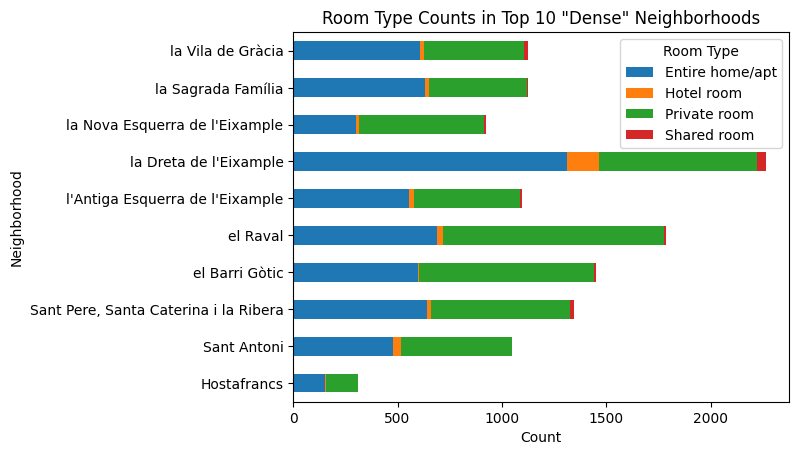

In [103]:
ax = room_type45_counts.plot(kind='barh', stacked=True)
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.title('Room Type Counts in Top 10 "Dense" Neighborhoods')
plt.legend(title='Room Type')
plt.show()

## Visualizing Price
Using Contextily we can view the density of the price per listing in each area to visualize what neighborhoods have the highest and lowest prices.

In [104]:
# sort by price_33 to be able to check the map against the table for correctness
gdf_sort = gdf.sort_values('price_33', ascending=False)
gdf_sort[['price_33', 'NOM']].tail(10)

,price_33,NOM
22,41.0,la Teixonera
70,41.0,la Trinitat Vella
62,30.0,Verdun
71,25.0,Baró de Viver
26,NaN,la Clota
31,NaN,el Turó de la Peira
60,NaN,Can Peguera
67,NaN,Torre Baró
68,NaN,Ciutat Meridiana
69,NaN,Vallbona


Text(0.5, 1.0, 'Choropleth Map of Price 33')

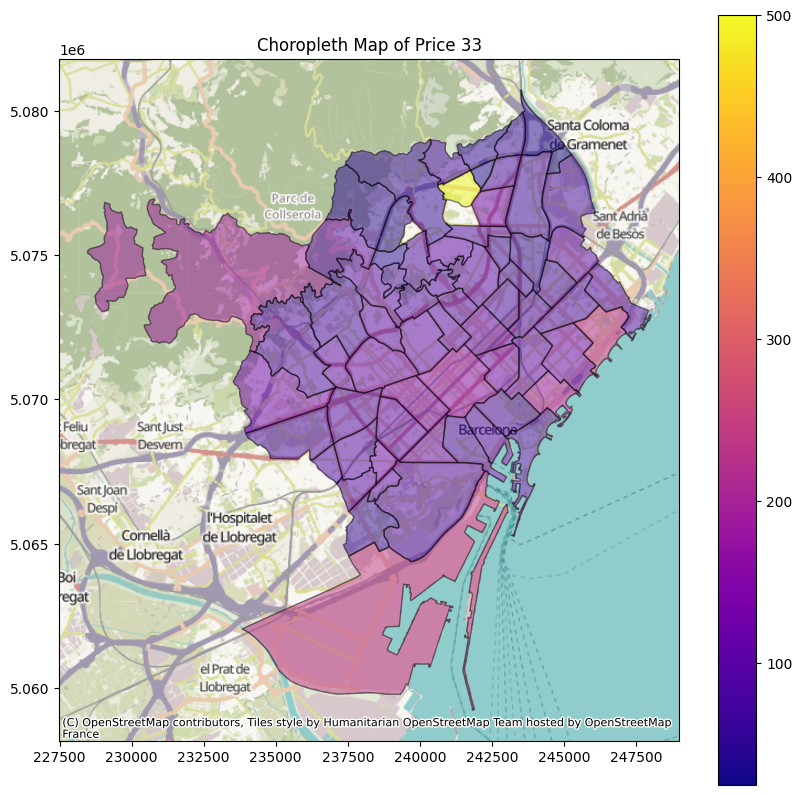

In [105]:
ax3 = gdf.to_crs('EPSG:3857').plot(figsize=(10, 10), alpha=0.5, edgecolor="black", column="price_33", cmap='plasma', legend=True)
ctx.add_basemap(ax3)
plt.title("Choropleth Map of Price 33")

## Plotting Price Density for Each Listing Set

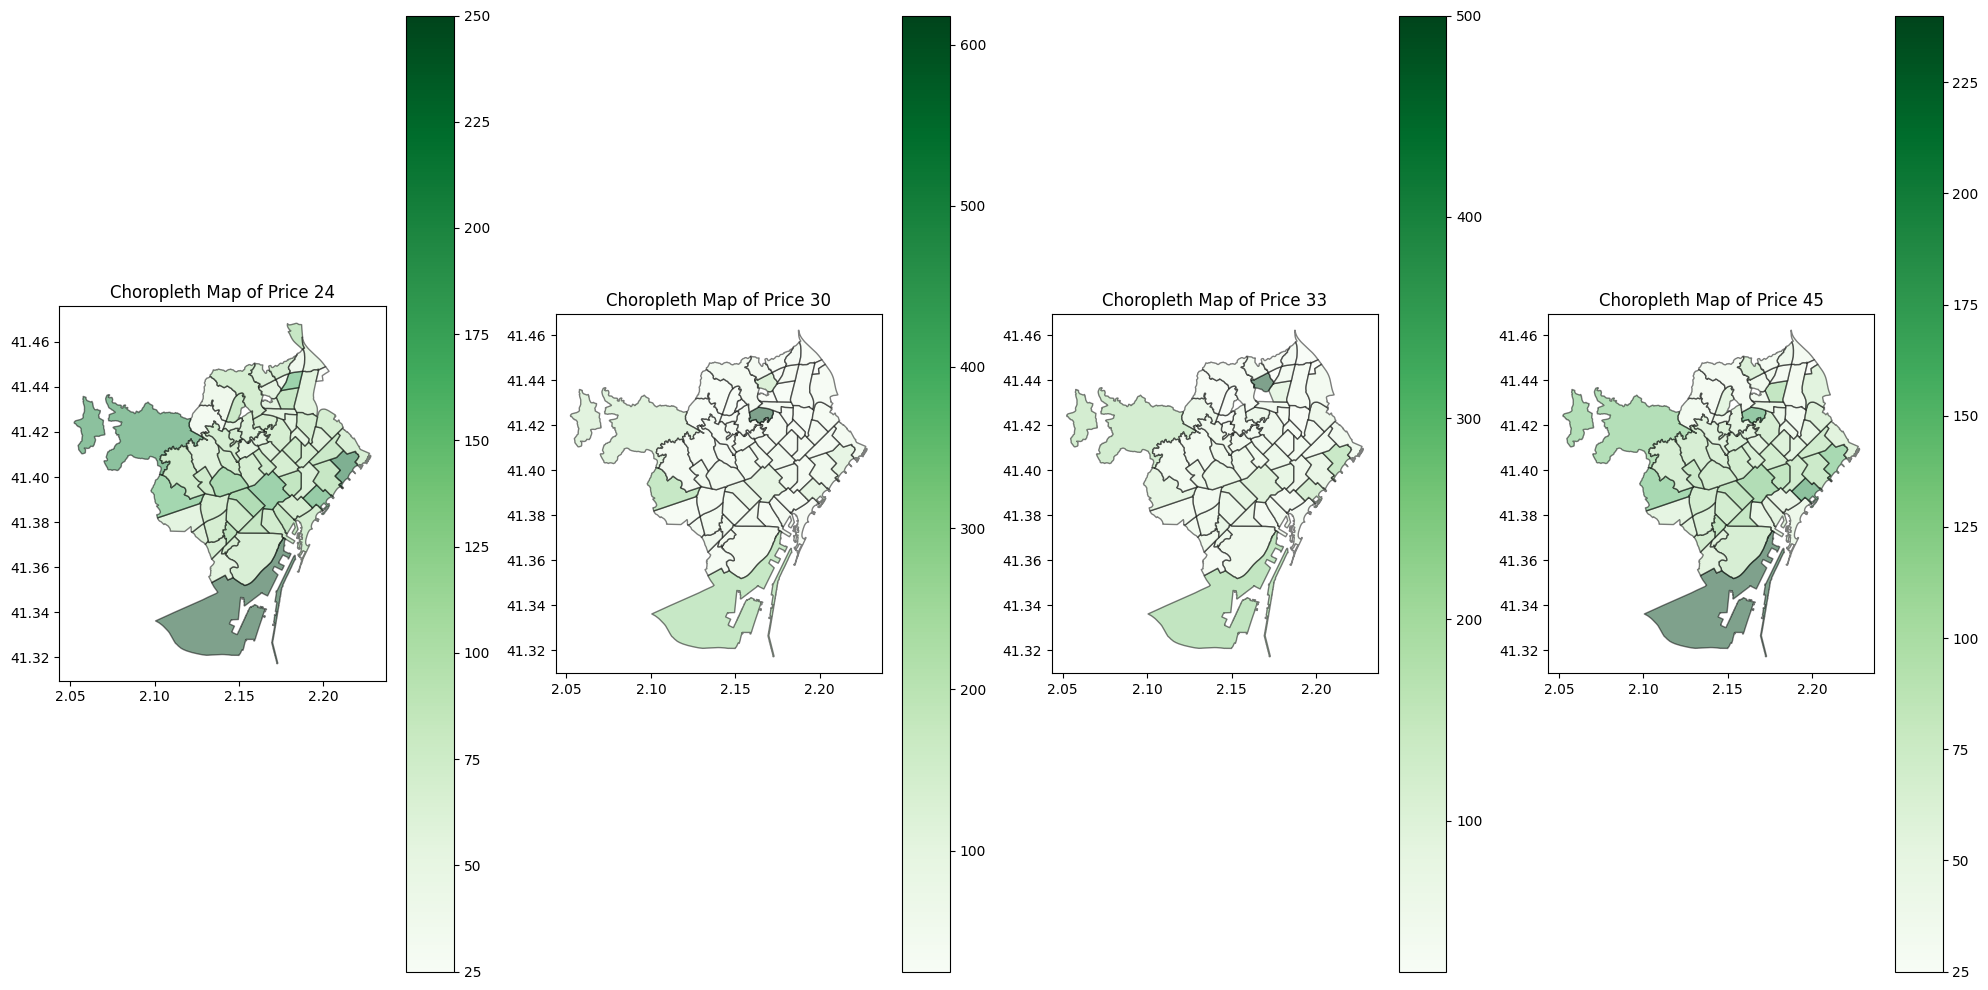

In [106]:
plt.figure(figsize=(20, 10))
sub1 = plt.subplot(1,4,1)
gdf.plot(ax=sub1, alpha=0.5, edgecolor='black', column='price_24', cmap='Greens', legend = True)
plt.title("Choropleth Map of Price 24")
sub2 = plt.subplot(1,4,2)
gdf.plot(ax=sub2, alpha=0.5, edgecolor='black', column='price_30', cmap='Greens', legend = True)
plt.title("Choropleth Map of Price 30")
sub3 = plt.subplot(1,4,3)
gdf.plot(ax = sub3, alpha=0.5, edgecolor='black', column='price_33', cmap='Greens', legend = True)
plt.title("Choropleth Map of Price 33")
sub4 = plt.subplot(1,4,4)
gdf.plot(ax=sub4, alpha=0.5, edgecolor='black', column='price_45', cmap='Greens', legend = True)
plt.title("Choropleth Map of Price 45")
plt.tight_layout()
plt.show()